Téléchargement du database 

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connexion et chargement
conn = sqlite3.connect('../data/database.db')
df = pd.read_sql_query("SELECT * FROM produits", conn)
conn.close()

# On transforme la colonne ingredients en une liste
df['ingredients'] = df['ingredients'].str.split(',')

Analyse des données

Nombre de produits

In [15]:
print(f"Nombre de produits: {len(df)}")

Nombre de produits: 197


Répartition nutri score

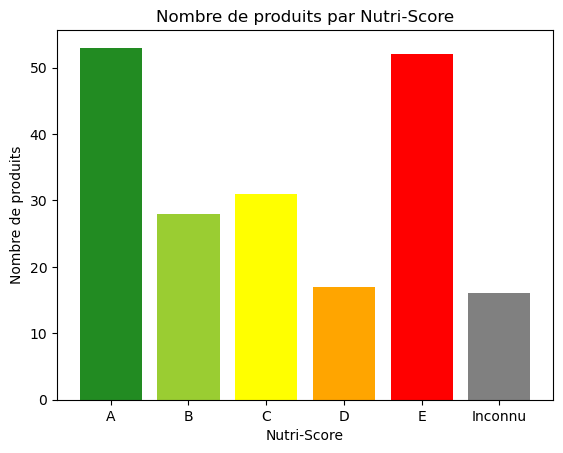

In [5]:
# On compte le nombre de produits par Nutri-Score
stats_nutri = df['nutriscore'].value_counts(dropna=False).sort_index()  # pour avoir les None et A, B, C, D, E dans l'ordre
stats_nutri.index = stats_nutri.index.fillna('Inconnu')

dico_couleurs = {
    'A': 'forestgreen', 
    'B': 'yellowgreen', 
    'C': 'yellow', 
    'D': 'orange', 
    'E': 'red',
    'Inconnu' : 'grey'
}

liste_couleurs = [dico_couleurs[grade] for grade in stats_nutri.index]

# Affichage du graphique
plt.bar(stats_nutri.index, stats_nutri.values, color=liste_couleurs)

plt.title('Nombre de produits par Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Nombre de produits')

plt.show()

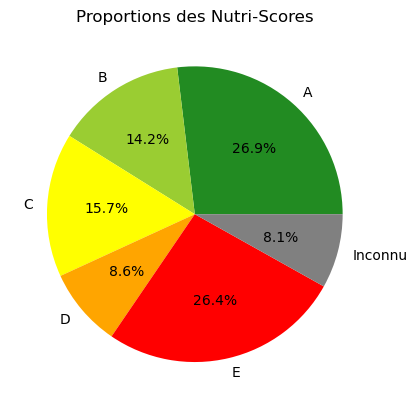

In [ ]:
plt.pie(
    stats_nutri.values, 
    labels=stats_nutri.index, 
    colors=liste_couleurs, 
    autopct='%1.1f%%',       # Affiche le pourcentage
)

plt.title('Proportions des Nutri-Scores')

plt.show()

Top 5 des ingrédients les plus fréquents

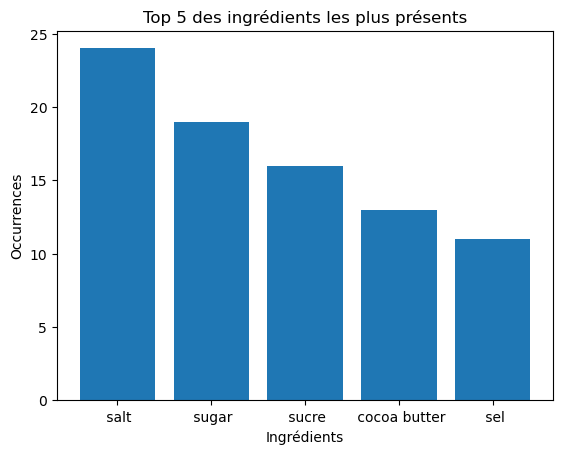

In [9]:
# On crée une ligne par ingrédient
df_ingredients = df.explode('ingredients')

top_5_ingredients = df_ingredients['ingredients'].value_counts().head(5)

#Affichage du graphique
plt.bar(top_5_ingredients.index, top_5_ingredients.values)

plt.title('Top 5 des ingrédients les plus présents')
plt.xlabel('Ingrédients')
plt.ylabel('Occurrences')

plt.show()

Rq : on voit ici le problème de notre database, qui n'a pas une version standardisée des ingrédients (dans plusieurs langues, avec différents noms, ajout de pourcentage ou non), ce qui fausse les statistiques.

Ingrédient le plus fréquent par nutri-score

In [ ]:
# On compte pour chaque paire (Score, Ingrédient)
df_comptage_nutri_ingr = df_ingredients.groupby(['nutriscore', 'ingredients']).size().reset_index(name='occurence')

# On trie pour prendre le plus fréquent par Nutri-Score
top_par_score = df_comptage_nutri_ingr.sort_values(['nutriscore', 'occurence']).groupby('nutriscore').tail(1)


print("Ingrédient le plus fréquent par Nutri-Score :")
print(top_par_score[['nutriscore', 'ingredients', 'occurence']])

Ingrédient le plus fréquent par Nutri-Score :
    nutriscore    ingredients  occurence
24           A           Salt          6
296          B            5 %          4
483          C          sucre          6
614          D           salt          5
728          E   cocoa butter         11


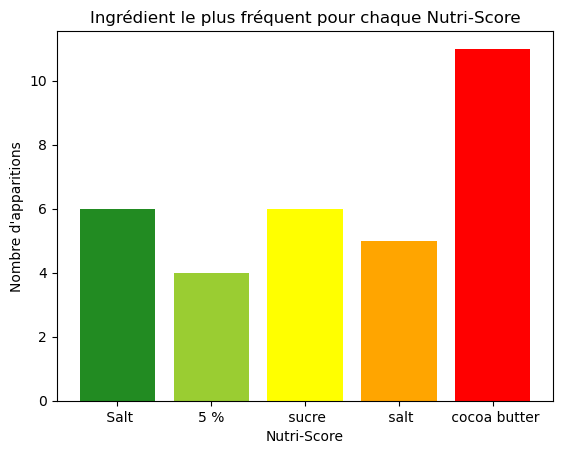

In [31]:
plt.bar(top_par_score['ingredients'], top_par_score['occurence'], color=liste_couleurs)

plt.title('Ingrédient le plus fréquent pour chaque Nutri-Score')
plt.ylabel("Nombre d'apparitions")
plt.xlabel("Nutri-Score")
plt.show()

Rq : on remarque encore que la non standardisation des ingrédients du site pose problème

Nombre d'ingrédients moyen par nutri-score

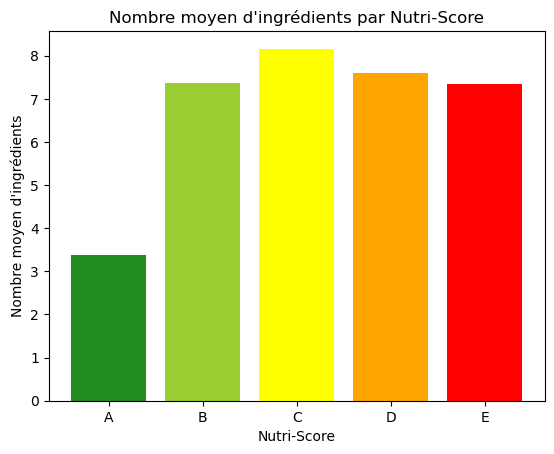

In [38]:
df_nb_ingredients = df[['ingredients', 'nutriscore']]

# On compte le nombre d'ingrédients par produit
df_nb_ingredients['nb_ingredients'] = df['ingredients'].str.len()

# On calcule la moyenne par Nutri-Score
moyenne_ingredients_par_nutriscore = df_nb_ingredients.groupby('nutriscore')['nb_ingredients'].mean()

# Affichage du graphique
plt.bar(moyenne_ingredients_par_nutriscore.index, moyenne_ingredients_par_nutriscore.values, color=liste_couleurs)
plt.title("Nombre moyen d'ingrédients par Nutri-Score")
plt.xlabel("Nutri-Score")
plt.ylabel("Nombre moyen d'ingrédients")
plt.show()

On remarque les produits avec le nutri-score A ont le moins d'ingrédients !